**plot a normal distribution for the Mass of a SM Higgs Boson (mH=125 GeV)**

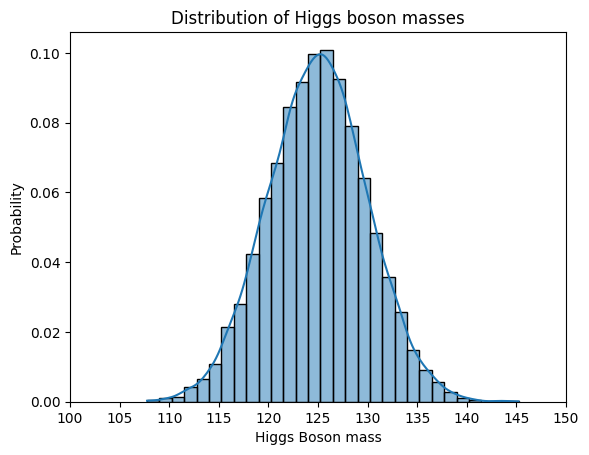

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Higgs Boson mass')
plt.ylabel('Probability')
plt.title("Distribution of Higgs boson masses")
plt.xticks(range(100,155,5))
plt.show()

**Lets standardise our distribution:**

Percentage of data within one standard deviation: 68.52
Percentage of data within two standard deviation: 95.27
Percentage of data within three standard deviation: 99.59


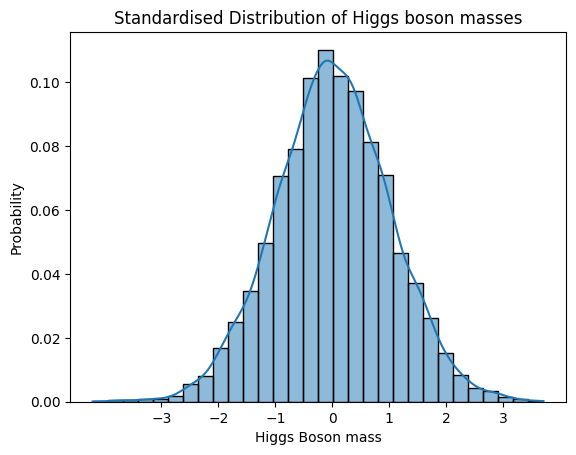

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Generating normally distributed data for Higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

#Finding the z-score for every value in the data
data = (data - mu)/sigma

#Proving the empirical rule
one_sd = len(data[(data>-1) & (data<1)])/len(data)*100
two_sd = len(data[(data>-2) & (data<2)])/len(data)*100
three_sd = len(data[(data>-3) & (data<3)])/len(data)*100

print('Percentage of data within one standard deviation:', round(one_sd,2))
print('Percentage of data within two standard deviation:', round(two_sd,2))
print('Percentage of data within three standard deviation:', round(three_sd,2))

#Plotting the z-scores
sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Higgs Boson mass')
plt.ylabel('Probability')
plt.xticks(range(-3,4,1))
plt.title("Standardised Distribution of Higgs boson masses")
plt.show()

**What percentage of Higgs boson candidates have a mass less than 133 GeV?**

Step1: Find z-score, which is the answer to ‘133 is how many standard deviations away from the mean?’

Step 2: Use Z-table to find the probability or Use norm.cdf() from scipy.stats in python to find the % area under the curve up until the calculated z-score.

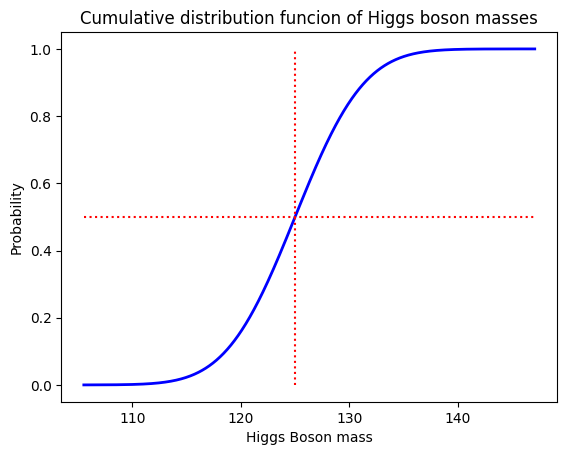

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Generating normally distributed data for Higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

#data = (data - mu)/sigma
# Create a range of values
x = np.linspace(min(data), max(data), 1000)

# Calculate the CDF
#cdf = norm.cdf(x, mu, sigma)

p= norm.cdf(x, mu, sigma)

#Plotting the CDF
plt.plot(x, p, color='blue', linewidth=2, markersize=2)
plt.hlines(0.5, min(data), max(data),linestyle='dotted', color='red')
plt.vlines(125, 0, 1,linestyle='dotted', color='red')
plt.xlabel('Higgs Boson mass')
plt.ylabel('Probability')
plt.title("Cumulative distribution funcion of Higgs boson masses")
plt.show()

In [49]:
from scipy.stats import norm

mu = 125
sigma = 5

#Find the z-score
z = (133-mu)/sigma


#Find the probability (area under the curve untin 133 GeV)
p = norm.cdf(z)

print('Percentage of the Higgs boson candidates that have a mass less than 133 GeV:', round(p*100,2))


Percentage of the Higgs boson candidates that have a mass less than 133 GeV: 94.52


**What percentage of Higgs boson candidates have a mass higher than 133 GeV?**

Step1: Find z-score, which is the answer to ‘133 is how many standard deviations away from the mean?’

Step 2: Use Z-table to find the probability or Use norm.cdf() from scipy.stats in python to find the % area under the curve up until the calculated z-score.

Step 3: Subtract it from 1 to get the inverse probability.



In [50]:
#Find the z-score
z = (133-mu)/sigma

#Find the probability (1 - area under the curve until 133 GeV)
p = 1 - norm.cdf(z)

#Finding the z-score for every value in the data
data = (data - mu)/sigma

print('Percentage of the Higgs boson candidates that have a mass higher than 133 GeV:', round(p*100,2))

Percentage of the Higgs boson candidates that have a mass higher than 133 GeV: 5.48


**What percentage of Higgs boson candidates have 120 < mH <135 GeV?**
Step1: Find z-score for 120 and 130 GeV

Step 2: Use norm.cdf() from scipy.stats in python to find the % area under the curve up until the calculated z-score.

Step 3: Subtract the two cumulative probability

In [51]:
#Find the z-score
z1 = (120-mu)/sigma
z2 = (130-mu)/sigma

#Find the probability (area under the curve)
p1 = norm.cdf(z1)
p2 = norm.cdf(z2)
diff = p2-p1

print('Percentage of the Higgs boson candidates that have  mH<120 GeV:', round(p1*100,2))
print('Percentage of the Higgs boson candidates that have  mH<130 GeV:', round(p2*100,2))
print('Percentage of the Higgs boson candidates that have  120<mH<125 GeV:', round(diff*100,2))

Percentage of the Higgs boson candidates that have  mH<120 GeV: 15.87
Percentage of the Higgs boson candidates that have  mH<130 GeV: 84.13
Percentage of the Higgs boson candidates that have  120<mH<125 GeV: 68.27


**What is the mass of a Higgs Boson who has a mass higher than 80% of all the candidates?**
Ans: Here, we need to calculate the z-score such that norm.cdf(z) = 0.8
To put it in simpler terms, we need to find the 80th percentile. We can find it using norm.ppf()

In [10]:
#Find the z-score for 80th percentile
z = norm.ppf(0.8) #percent point function, gives percentile
x = (z*sigma) + mu #find the value using z-score formula

print("The mass for which a Higgs Boson has a mass higher than 80% of all the candidates:", round(x,2))

The mass for which a Higgs Boson has a mass higher than 80% of all the candidates: 129.21


**Tests for Normality**
Many machine learning algorithms are based on the assumption that the data or the prediction errors are normally distributed. But given a set of values, how do you test if they are normally distributed?

One way is to plot the data on a histogram and inspect it for features of normal distribution such as symmetry, bell-shape, skewness etc. Such visual inspection may give a rough idea but there are a few scientific methods as well which are widely used: **QQ Plot:** A Q-Q plot (Quantile-Quantile Plot) compares the quantiles/z-scores of the data against the quantiles of a theoretical normal distribution. A function in python’s statsmodels library called qqplot (https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) can be used to create the plot:

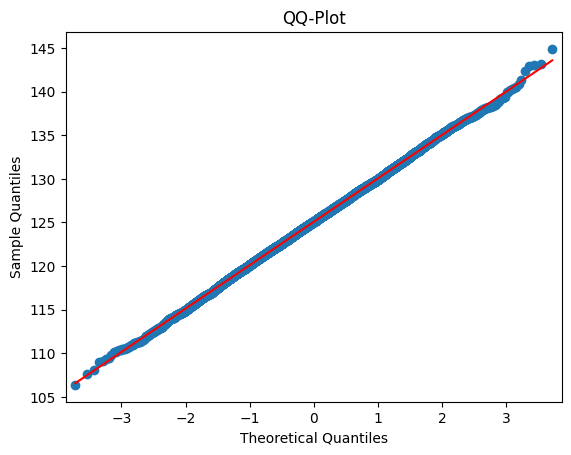

In [2]:
#QQPlot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#Generating normally distributed data for higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

#QQPlot
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='s')
plt.title('QQ-Plot')
plt.show()

If the points on the plot are not significantly diverging from the diagonal (x=y), it shows that the data is normally distributed.

In out case the data were not standardised so on y-axis we have the quantiles for the higgs mass distribution. If we standardise them we have:

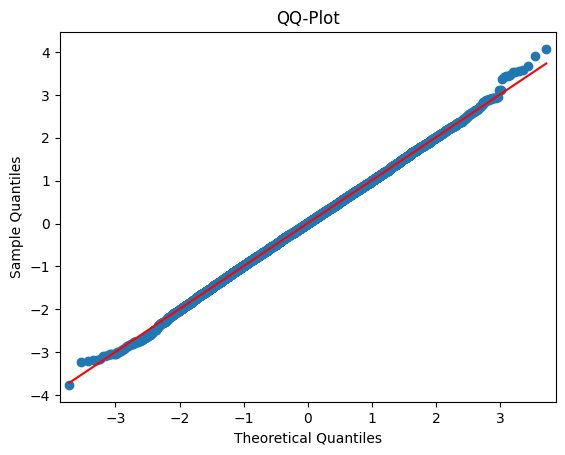

In [3]:
#QQPlot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#Generating normally distributed data for Higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)
data = (data - mu)/sigma

#QQPlot
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='s')
plt.title('QQ-Plot')
plt.show()